<a href="https://colab.research.google.com/github/VitorRodgs/Redes-Neurais-Convolucionais/blob/main/Rna_conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quantidade de Imagens para Treino:  (60000, 28, 28)
Quantidade de Imagens para Teste:  (10000, 28, 28)


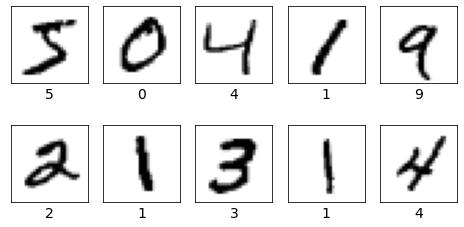

Model: "rede_IF_MultClass_MNIS"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 2.0605 - accuracy: 0.8746
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4023 - accuracy: 0.9090
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3802 - accuracy: 

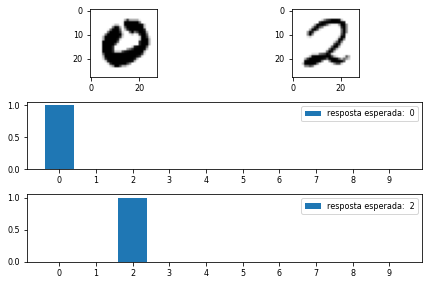

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print('Quantidade de Imagens para Treino: ',train_images.shape) 
print('Quantidade de Imagens para Teste: ',test_images.shape)

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,4))
for i in range(2*5):
    plt.subplot(2,5,i+1)
    plt.xticks([]);plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(str(train_labels[i]))
plt.show()

saidas=10
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(saidas, activation='softmax')
],name='rede_IF_MultClass_MNIS')


opt=tf.keras.optimizers.Adam(learning_rate=0.002)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

history=model.fit(train_images, train_labels, epochs=5,verbose=1)


pred = model.predict(test_images)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)
print('\n Accuracia do Teste: ', test_acc)

i_ex=[25, 35]
class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']
plt.rcParams.update({'font.size': 8})
plt.figure(),
plt.subplot(3,2,1),plt.imshow(test_images[i_ex[0]],cmap=plt.cm.binary)
plt.subplot(3,2,2),plt.imshow(test_images[i_ex[1]],cmap=plt.cm.binary)
plt.subplot(3,1,2),plt.bar(class_names,pred[i_ex[0]])
plt.legend(['resposta esperada:  '+class_names[test_labels[i_ex[0]]]])
plt.subplot(3,1,3),plt.bar(class_names,pred[i_ex[1]])
plt.legend(['resposta esperada:  '+class_names[test_labels[i_ex[1]]]])
plt.tight_layout()